<a href="https://colab.research.google.com/github/JingYannn/Leetcode/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 兼容 pythone2,3
from __future__ import print_function
# 导入相关python库
import os
import numpy as np
import pandas as pd
# 设定随机数种子
np.random.seed(36)
# 使用matplotlib库画图
import matplotlib
import seaborn
import matplotlib.pyplot as plot

from sklearn import datasets

### 数据读取，预处理

In [26]:
housing = pd.read_csv('kc_train.csv')
target = pd.read_csv('kc_train2.csv')
t = pd.read_csv('kc_test.csv')

In [27]:
#数据预处理
housing.info()    #查看是否有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   20150302  9999 non-null   int64  
 1   3         9999 non-null   int64  
 2   2.25      9999 non-null   float64
 3   1670      9999 non-null   int64  
 4   6240      9999 non-null   int64  
 5   1         9999 non-null   float64
 6   8         9999 non-null   int64  
 7   1240      9999 non-null   int64  
 8   430       9999 non-null   int64  
 9   1974      9999 non-null   int64  
 10  0         9999 non-null   int64  
 11  47.6413   9999 non-null   float64
 12  -122.113  9999 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 1015.6 KB


In [28]:
# 特征缩放
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(housing) # 进行内部拟合，内部参数会发生变化
scaler_housing = minmax_scaler.transform(housing)
scaler_housing = pd.DataFrame(scaler_housing, columns = housing.columns)

In [29]:
print(scaler_housing.head)

<bound method NDFrame.head of       20150302    3      2.25      1670  ...      1974    0   47.6413  -122.113
0     0.968479  0.4  0.322581  0.306316  ...  0.730435  0.0  0.765001  0.401163
1     0.958105  0.3  0.419355  0.294737  ...  0.930435  0.0  0.637393  0.429402
2     0.059950  0.5  0.322581  0.264211  ...  0.773913  0.0  0.622513  0.316445
3     0.010075  0.5  0.354839  0.173684  ...  0.600000  0.0  0.921236  0.288206
4     0.997905  0.2  0.129032  0.041053  ...  0.504348  0.0  0.536956  0.166944
...        ...  ...       ...       ...  ...       ...  ...       ...       ...
9994  0.061746  0.4  0.322581  0.168421  ...  0.817391  0.0  0.322174  0.272425
9995  0.050274  0.4  0.322581  0.201053  ...  0.973913  0.0  0.323629  0.362957
9996  0.051072  0.4  0.451613  0.438947  ...  0.826087  0.0  0.646288  0.334718
9997  0.011771  0.6  0.548387  0.685263  ...  0.886957  0.0  0.956332  0.421096
9998  0.968379  0.2  0.129032  0.042105  ...  0.417391  0.0  0.636422  0.205150

[9999 row

### 模型训练
使用sklearn的线性回归函数进行训练。梯度下降法获得误差最小值，最后用均方误差法来评价模型的好坏程度，并画图进行比较。

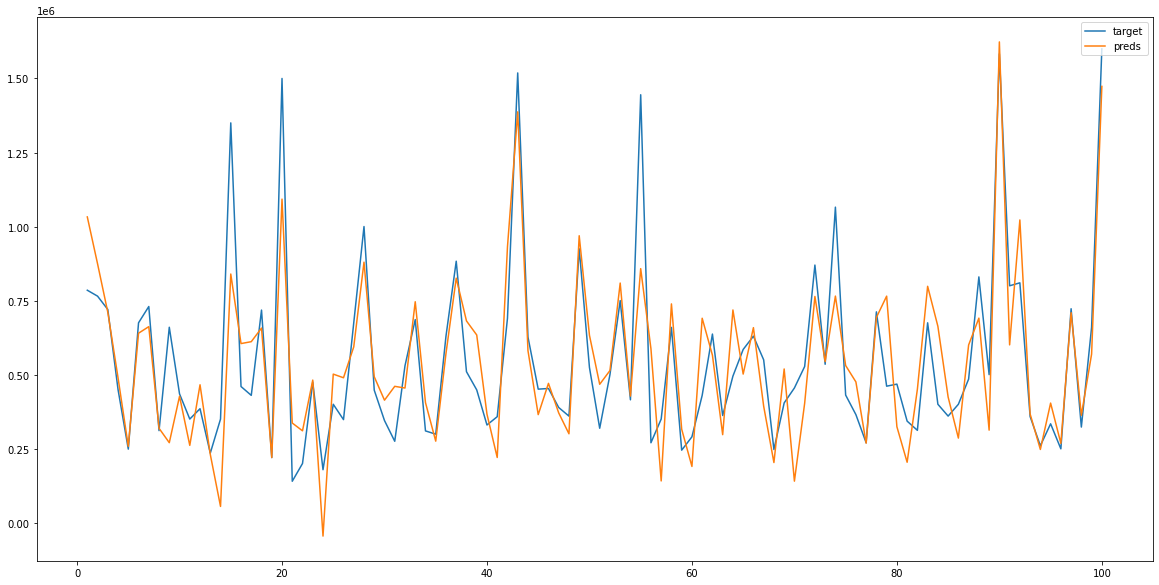

In [31]:
#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg=LinearRegression()
#进行拟合
LR_reg.fit(scaler_housing,target)


#使用均方误差用于评价模型好坏
from sklearn.metrics import mean_squared_error
preds=LR_reg.predict(scaler_housing)   #输入数据进行预测得到结果
mse=mean_squared_error(preds,target)   #使用均方误差来评价模型好坏，可以输出mse进行查看评价值

#绘图进行比较
plot.figure(figsize=(20,10))       #画布大小
num=100
x=np.arange(1,num+1)              #取100个点进行比较
plot.plot(x,target[:num],label='target')      #目标取值
plot.plot(x,preds[:num],label='preds')        #预测取值
plot.legend(loc='upper right')  #线条显示位置
plot.show()

In [32]:
mm=MinMaxScaler()
mm.fit(t)
scaler_t=mm.transform(t)
scaler_t=pd.DataFrame(scaler_t,columns=t.columns)

In [33]:
#输出测试数据
result=LR_reg.predict(scaler_t)
df_result=pd.DataFrame(result)
df_result.to_csv("result.csv")